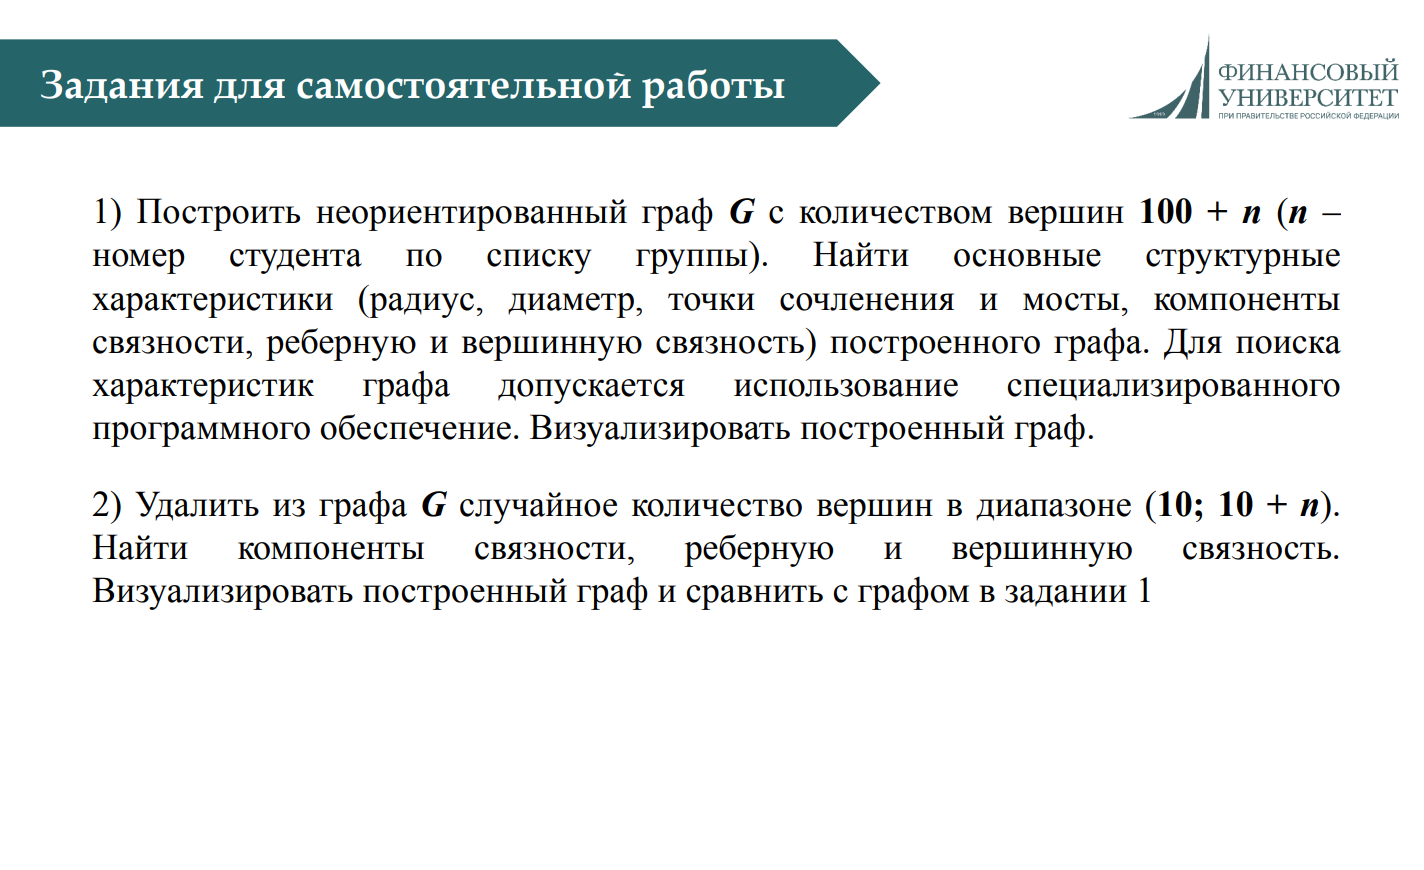

Ваш вариант n=8. Строим граф на 108 вершин.
Количество компонент связности: 1
Радиус графа: 4
Диаметр графа: 6
Реберная связность: 1
Вершинная связность: 1
Количество точек сочленения: 3
Количество мостов: 3
Точки сочленения: [47, 101, 5]
Мосты: [(5, 54), (10, 47), (59, 101)]


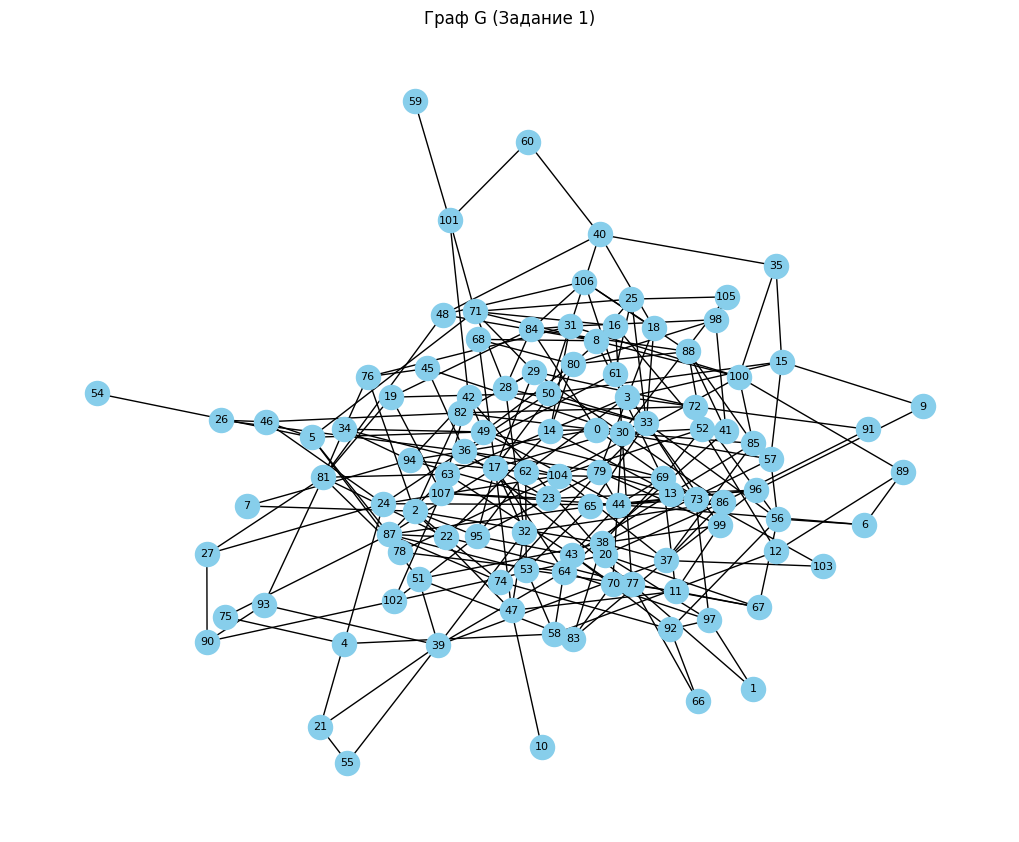

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

n = 8
num_vertices = 100 + n

print(f"Ваш вариант n={n}. Строим граф на {num_vertices} вершин.")


G = nx.erdos_renyi_graph(num_vertices, 0.04)



components = list(nx.connected_components(G))
num_components = len(components)
print(f"Количество компонент связности: {num_components}")

if num_components == 1:
    print(f"Радиус графа: {nx.radius(G)}")
    print(f"Диаметр графа: {nx.diameter(G)}")
    print(f"Реберная связность: {nx.edge_connectivity(G)}")
    print(f"Вершинная связность: {nx.node_connectivity(G)}")
else:
    print("Граф несвязный. Радиус и диаметр бесконечны (или определяются для каждой компоненты отдельно).")
    largest_cc = max(nx.connected_components(G), key=len)
    subgraph = G.subgraph(largest_cc)
    print(f"Диаметр наибольшей компоненты: {nx.diameter(subgraph)}")

articulation_points = list(nx.articulation_points(G))
bridges = list(nx.bridges(G))
print(f"Количество точек сочленения: {len(articulation_points)}")
print(f"Количество мостов: {len(bridges)}")
print(f"Точки сочленения: {articulation_points}")
print(f"Мосты: {bridges}")

# Визуализация графа 1
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # Расположение вершин
nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=8)
plt.title("Граф G (Задание 1)")
plt.show()

Удаляем 15 случайных вершин.
Количество компонент связности: 1
Реберная связность: 1
Вершинная связность: 1


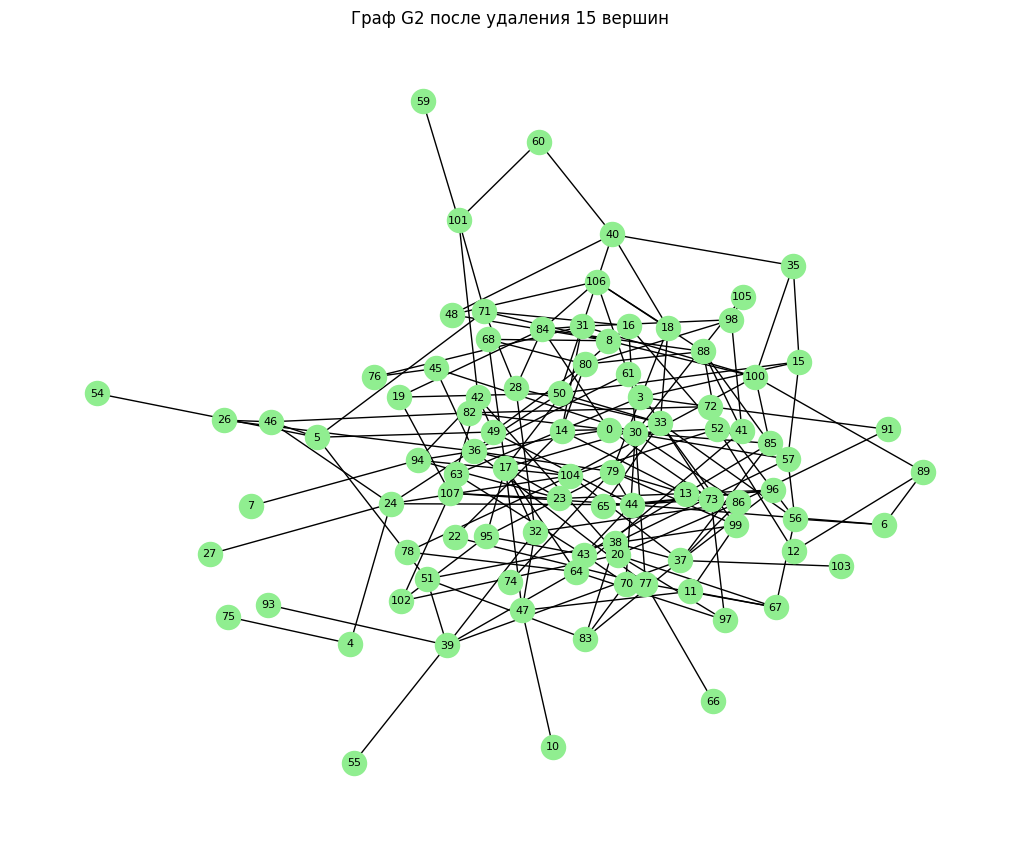

In [7]:
min_remove = 11
max_remove = 10 + n - 1

if max_remove < min_remove:
    max_remove = min_remove

k = random.randint(min_remove, max_remove)
print(f"Удаляем {k} случайных вершин.")

nodes_to_remove = random.sample(list(G.nodes()), k)

G2 = G.copy()
G2.remove_nodes_from(nodes_to_remove)


components_2 = list(nx.connected_components(G2))
print(f"Количество компонент связности: {len(components_2)}")

if nx.is_connected(G2):
    print(f"Реберная связность: {nx.edge_connectivity(G2)}")
    print(f"Вершинная связность: {nx.node_connectivity(G2)}")
else:
    print("Граф стал несвязным. Реберная и вершинная связность = 0")

plt.figure(figsize=(10, 8))
pos_2 = {node: pos[node] for node in G2.nodes()}
nx.draw(G2, pos_2, with_labels=True, node_size=300, node_color='lightgreen', font_size=8)
plt.title(f"Граф G2 после удаления {k} вершин")
plt.show()

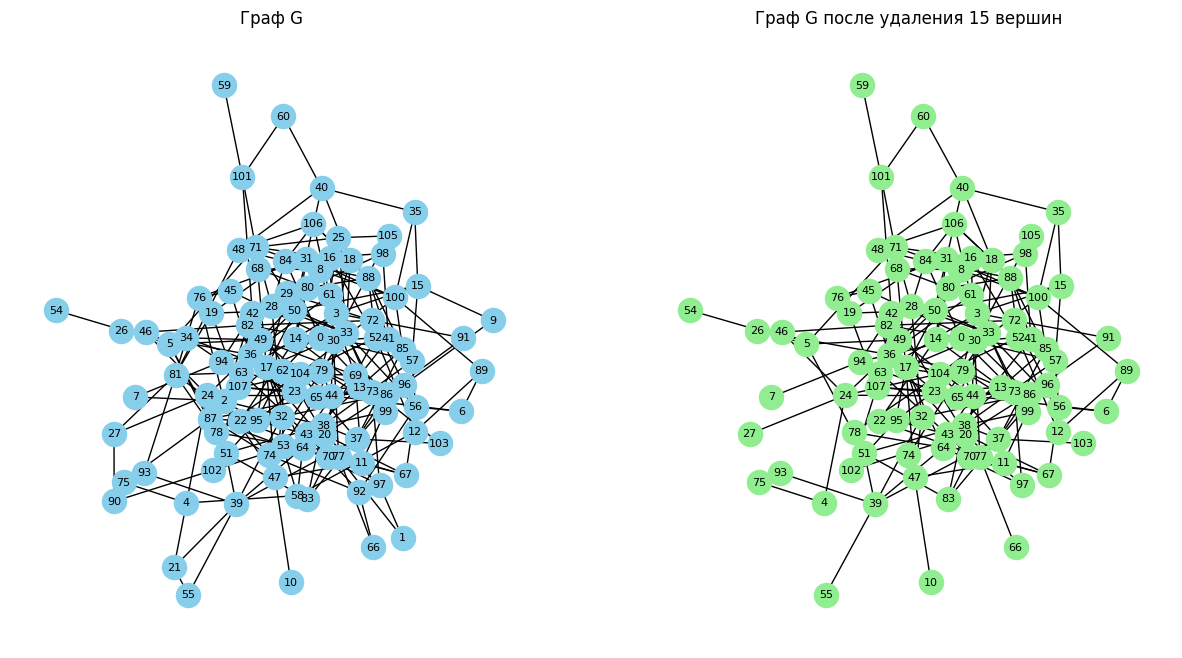

In [12]:
fig, ax = plt.subplots(1,2,figsize=(15, 8))
pos = nx.spring_layout(G, seed=42)  # Расположение вершин
nx.draw(G, pos,ax=ax[0], with_labels=True, node_size=300, node_color='skyblue', font_size=8)
ax[0].set_title("Граф G ")

pos_2 = {node: pos[node] for node in G2.nodes()}
nx.draw(G2, pos_2, ax=ax[1], with_labels=True, node_size=300, node_color='lightgreen', font_size=8)
ax[1].set_title(f"Граф G после удаления {k} вершин")
plt.show()